<a href="https://colab.research.google.com/github/bluefruit0215/book_study/blob/master/8_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

In [11]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0

train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

In [12]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(28,28,1)))

In [13]:
model.add(keras.layers.MaxPooling2D(2))

In [14]:
model.add(keras.layers.Conv2D(64, kernel_size=3, activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(2))

In [15]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation='softmax'))

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               313700    
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)              

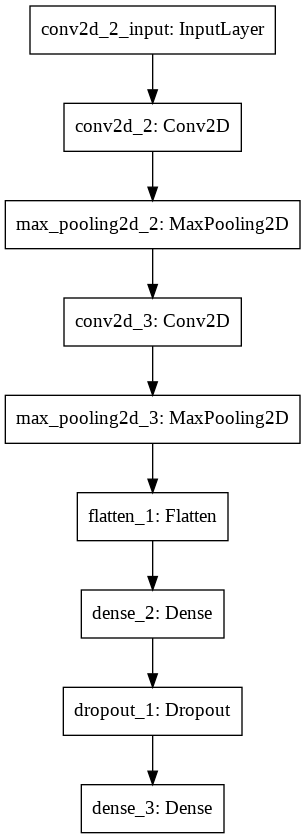

In [17]:
keras.utils.plot_model(model)

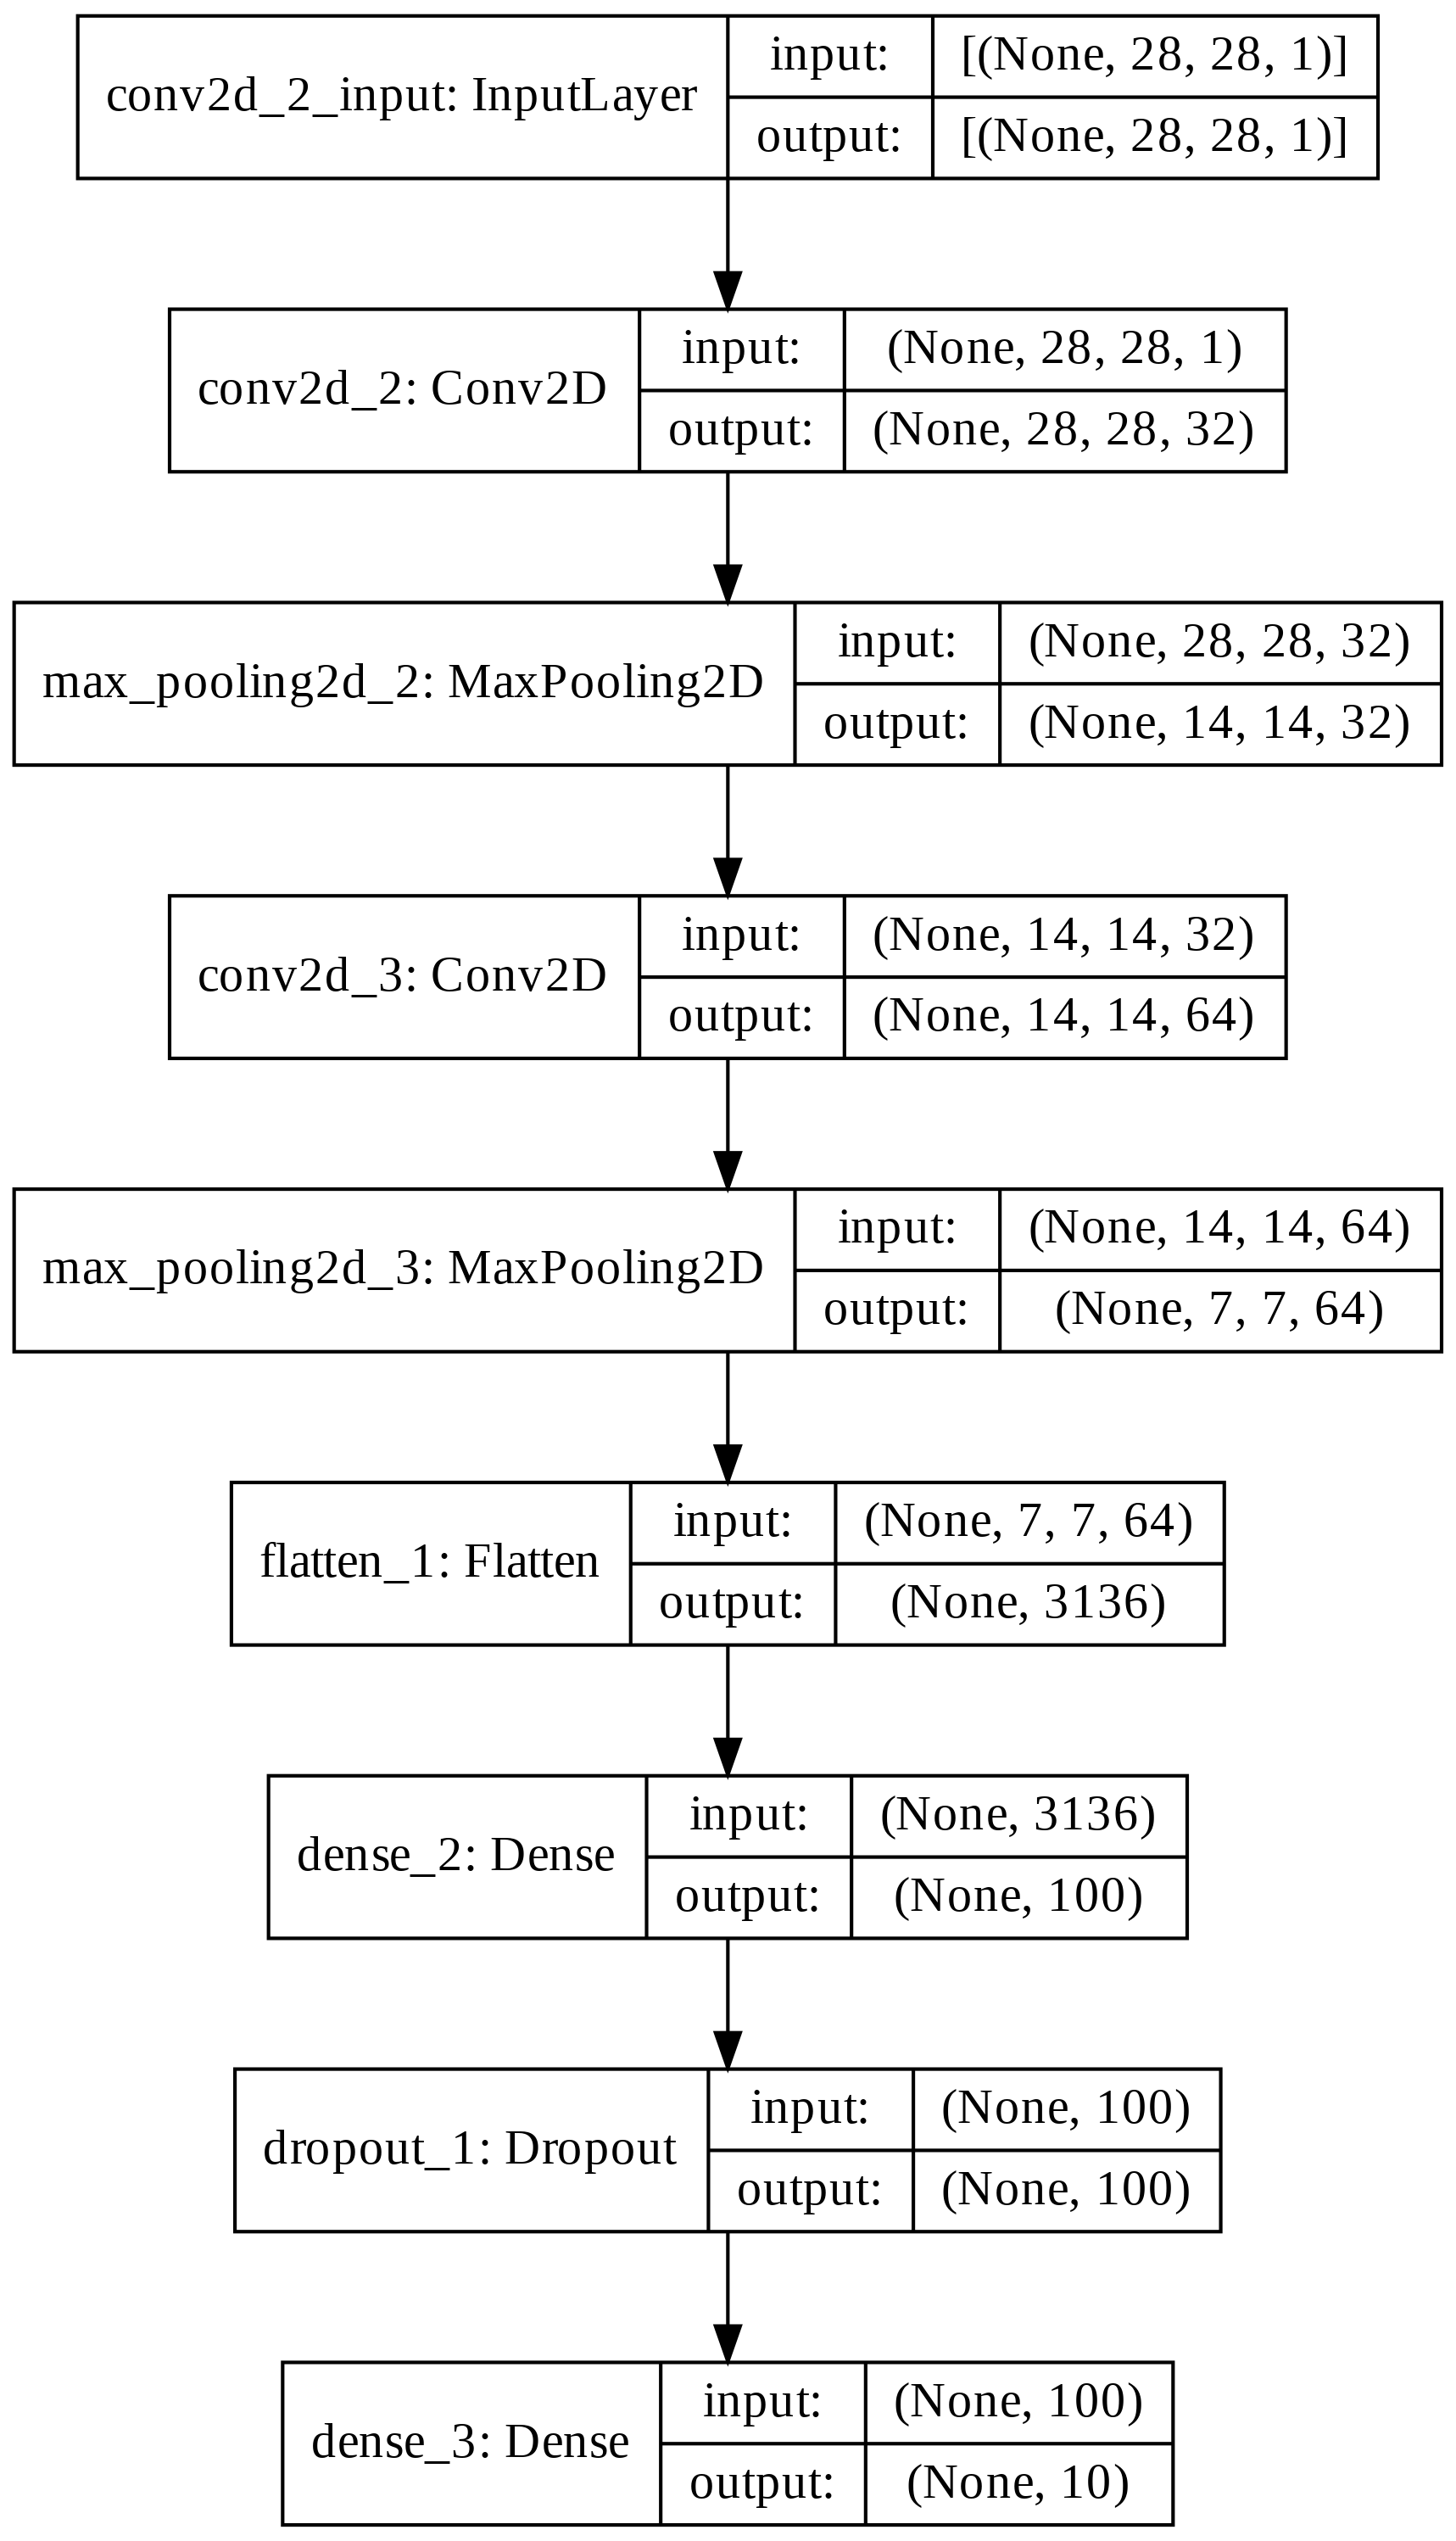

In [18]:
keras.utils.plot_model(model, show_shapes=True, to_file='cnn-architecture.png', dpi=300)

In [19]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5')

early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)

history = model.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - 61s 40ms/step - loss: 0.7176 - accuracy: 0.7460 - val_loss: 0.3365 - val_accuracy: 0.8761
Epoch 2/20
1500/1500 [==============================] - 58s 39ms/step - loss: 0.3656 - accuracy: 0.8680 - val_loss: 0.2896 - val_accuracy: 0.8903
Epoch 3/20
1500/1500 [==============================] - 58s 39ms/step - loss: 0.3025 - accuracy: 0.8918 - val_loss: 0.2538 - val_accuracy: 0.9030
Epoch 4/20
1500/1500 [==============================] - 58s 39ms/step - loss: 0.2579 - accuracy: 0.9041 - val_loss: 0.2465 - val_accuracy: 0.9082
Epoch 5/20
1500/1500 [==============================] - 58s 39ms/step - loss: 0.2384 - accuracy: 0.9129 - val_loss: 0.2242 - val_accuracy: 0.9182
Epoch 6/20
1500/1500 [==============================] - 58s 39ms/step - loss: 0.2200 - accuracy: 0.9180 - val_loss: 0.2279 - val_accuracy: 0.9151
Epoch 7/20
1500/1500 [==============================] - 58s 39ms/step - loss: 0.2031 - accuracy: 0.9241 - val_loss: 0.2235 -

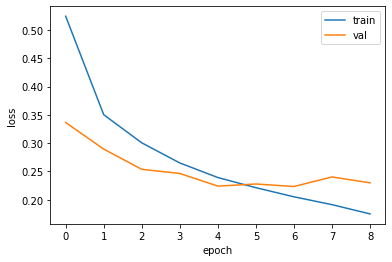

In [20]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [21]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 4s 11ms/step - loss: 0.2235 - accuracy: 0.9173


[0.22351263463497162, 0.9173333048820496]

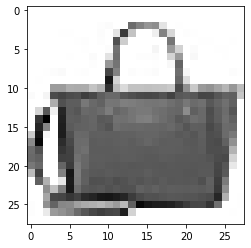

In [22]:
plt.imshow(val_scaled[0].reshape(28, 28), cmap='gray_r')
plt.show()

In [23]:
preds = model.predict(val_scaled[0:1])
print(preds)

[[6.4393139e-17 1.1889123e-22 1.2635478e-18 9.4733382e-16 5.0702678e-16
  4.0771956e-18 5.3253266e-15 1.4105515e-19 1.0000000e+00 1.9342504e-18]]


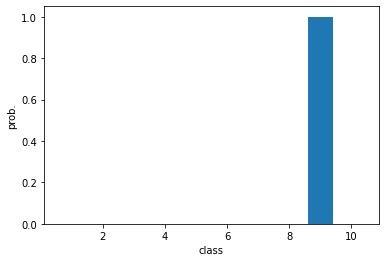

In [24]:
plt.bar(range(1, 11), preds[0])
plt.xlabel('class')
plt.ylabel('prob.')
plt.show()

In [25]:
classes = ['티셔츠', '바지', '스웨터', '드레스', '코트', '샌달', '셔츠', '스니커즈', '가방', '앵콜 부츠']


In [26]:
import numpy as np
print(classes[np.argmax(preds)])

가방


In [27]:
test_scaled = test_input.reshape(-1, 28, 28, 1) / 255.0
model.evaluate(test_scaled, test_target)

313/313 [==============================] - 4s 12ms/step - loss: 0.2418 - accuracy: 0.9139


[0.2418433129787445, 0.9139000177383423]